# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the Data**

In [2]:
df = pd.read_csv('Data_for_UCI_named.csv')

In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

**Predictive features:**

1. 'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);

2. 'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);

3. 'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');

**Dependent variables:**

'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);

'stabf': a categorical (binary) label ('stable' or 'unstable').

Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification).

In [6]:
# Dropping 'stab' column
df = df.drop('stab', axis=1)

**Splitting the data into 80-20 ratio**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('stabf', axis=1)
y = df['stabf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Scaling the data using StandardScaler**

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaled_X_train = scaler.fit_transform(X_train)

In [12]:
scaled_X_test = scaler.transform(X_test)

In [13]:
normalised_train_df = pd.DataFrame(scaled_X_train, columns=X.columns)
normalised_test_df = pd.DataFrame(scaled_X_test, columns=X.columns)

In [14]:
normalised_train_df.head(2)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521


In [15]:
normalised_test_df.head(2)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.593951,-0.412733,1.503924,1.116943,0.403423,-1.492971,-0.785033,1.566781,-0.901007,1.167203,-1.507330,1.084726
1,0.202190,0.374416,-0.188800,-0.522268,-0.225967,-1.058483,0.420047,1.028627,-1.625721,-0.395660,1.414651,1.226011


# Random Forest

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
# Fitting the training data to the model
rfc = RandomForestClassifier(random_state=1).fit(normalised_train_df, y_train)

In [19]:
# Getting predictions on the test data
rfc_pred = rfc.predict(normalised_test_df)

# checking how well the model preforms
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[ 625   87]
 [  55 1233]]
              precision    recall  f1-score   support

      stable       0.92      0.88      0.90       712
    unstable       0.93      0.96      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [33]:
print(round(accuracy_score(y_test, rfc_pred), 4))

0.929


# Extra Trees Classifier

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
# Fitting the training data to ExtraTreesClassifier
ex_trees = ExtraTreesClassifier(random_state=1).fit(normalised_train_df, y_train)

In [22]:
# Getting the predictions
ex_pred = ex_trees.predict(normalised_test_df)

# checking how well the model preforms
print(confusion_matrix(y_test, ex_pred))
print(classification_report(y_test, ex_pred))

[[ 606  106]
 [  38 1250]]
              precision    recall  f1-score   support

      stable       0.94      0.85      0.89       712
    unstable       0.92      0.97      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000



# XGBOOST

In [23]:
from xgboost import XGBClassifier

C:\Users\Maish\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [24]:
xg_model = XGBClassifier(random_state=1).fit(normalised_train_df, y_train)

C:\Users\Maish\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Maish\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:57:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [25]:
# Getting the predictions
xg_pred = xg_model.predict(normalised_test_df)

# checking how well the model preforms
print(confusion_matrix(y_test, xg_pred))
print(classification_report(y_test, xg_pred))

[[ 648   64]
 [  45 1243]]
              precision    recall  f1-score   support

      stable       0.94      0.91      0.92       712
    unstable       0.95      0.97      0.96      1288

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000



In [34]:
round(accuracy_score(y_test, xg_pred), 4)

0.9455

# LIGHTGBM

In [26]:
from lightgbm import LGBMClassifier

In [27]:
lgbm = LGBMClassifier(random_state=1).fit(normalised_train_df, y_train)

In [28]:
# Getting the predictions
lgbm_pred = lgbm.predict(normalised_test_df)

# checking how well the model preforms
print(confusion_matrix(y_test, lgbm_pred))
print(classification_report(y_test, lgbm_pred))

[[ 641   71]
 [  50 1238]]
              precision    recall  f1-score   support

      stable       0.93      0.90      0.91       712
    unstable       0.95      0.96      0.95      1288

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000



In [35]:
round(accuracy_score(y_test, lgbm_pred), 4)

0.9395

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [4, 6, 8],
    'max_features': ['auto','log2']
}

model = RandomizedSearchCV(ExtraTreesClassifier(),param_distributions=param_grid, scoring='accuracy',
                          n_jobs=-1, cv=5, verbose=1, random_state=1)

In [47]:
model.fit(normalised_train_df, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 300, 500, 1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [48]:
model.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2'}

In [49]:
model.best_score_

0.915625

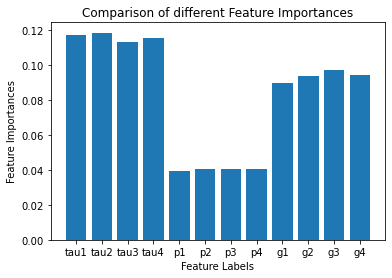

In [44]:
plt.bar(X.columns, ex_trees.feature_importances_)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()